In [ ]:
import numpy as np

In [ ]:
def compute_vector_len(vector):
    len_of_vector = np.linalg.norm(vector)

    return len_of_vector

In [ ]:
# Test length of vector
vector = np.array([1, 2, 3])
compute_vector_len(vector=vector)

3.7416573867739413

In [ ]:
def compute_dot_product(vector1, vector2):
    dot_product = np.dot(vector1, vector2)

    return dot_product

In [ ]:
# Test dot product
vector1 = np.array([1, 2, 3])
vector2 = np.array([4, 5, 6])
compute_dot_product(vector1=vector1, vector2=vector2)

32

In [ ]:
def matrix_multi_vector(matrix, vector):
    return matrix @ vector

In [ ]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
vector = np.array([7, 8, 9])
matrix_multi_vector(matrix=matrix, vector=vector)

array([ 50, 122])

In [ ]:
def matrix_multi_matrix(matrix1, matrix2):
    return matrix1 @ matrix2

In [ ]:
# Test mat mul mat
matrix1 = np.array([[1, 2], [4, 5]])
matrix2 = np.array([[7, 8, 9], [10, 11, 12]])
matrix_multi_matrix(matrix1=matrix1, matrix2=matrix2)

array([[27, 30, 33],
       [78, 87, 96]])

In [ ]:
def inverse_matrix(matrix):
    return np.linalg.inv(matrix)

In [ ]:
matrix = np.array([[1, 2], [3, 4]])
inverse_matrix(matrix=matrix)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    return eigenvalues, eigenvectors

In [ ]:
# Test eigen vector
matrix = np.array([[-6, 3], [4, 5]])
compute_eigenvalues_eigenvectors(matrix=matrix)

(array([-7.,  6.]),
 array([[-0.9486833 , -0.24253563],
        [ 0.31622777, -0.9701425 ]]))

In [ ]:
def compute_cosine(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [ ]:
v1 = np.array([0, 1])
v2 = np.array([1, 1])
compute_cosine(v1=v1, v2=v2)

0.7071067811865475

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('GreenBackground.png')
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg')
bg2_image = cv2.resize(bg2_image, (678, 381))

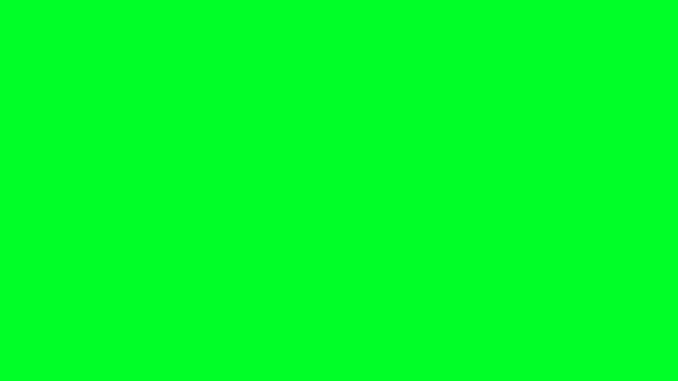

In [ ]:
cv2_imshow(bg1_image)

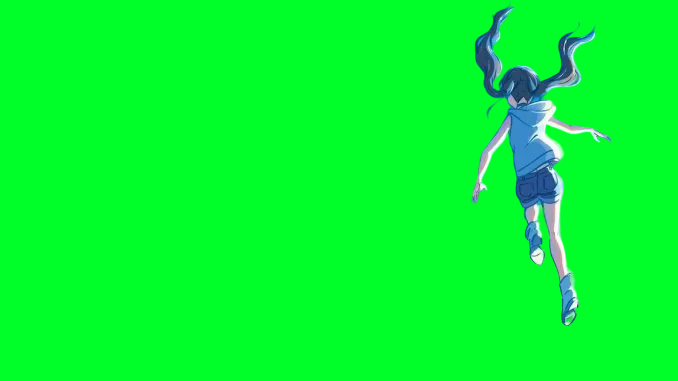

In [ ]:
cv2_imshow(ob_image)

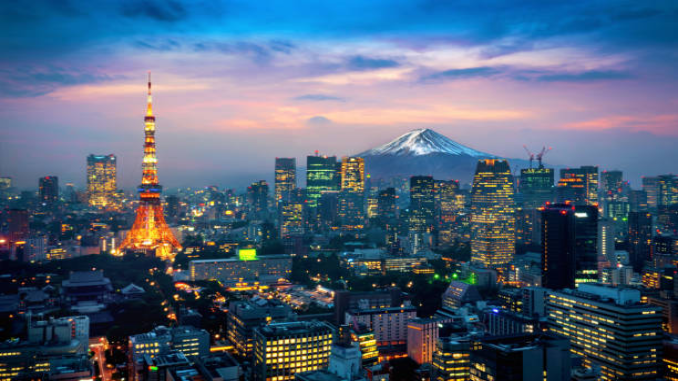

In [ ]:
cv2_imshow(bg2_image)

In [ ]:
def compute_diffirence(bg_img, input_img):
    return cv2.cvtColor(bg_img - input_img, cv2.COLOR_BGR2GRAY)

In [ ]:
diffirence_single_channel = compute_diffirence(bg_img=bg1_image, input_img=ob_image)

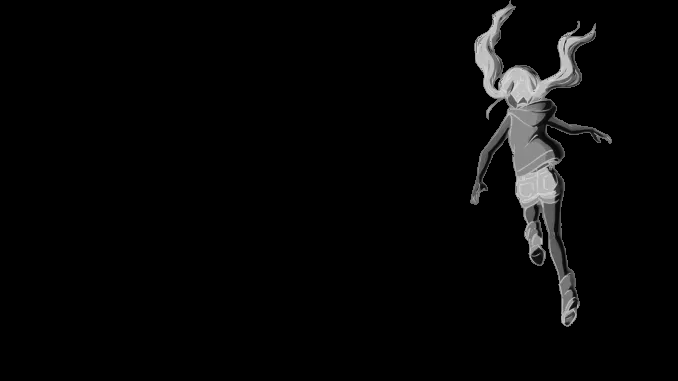

In [ ]:
cv2_imshow(diffirence_single_channel)

In [ ]:
def compute_binary_mask(diffirence_single_channel):
    return np.where(diffirence_single_channel > 0, 1, 0)

In [ ]:
binary_image = compute_binary_mask(diffirence_single_channel=diffirence_single_channel)

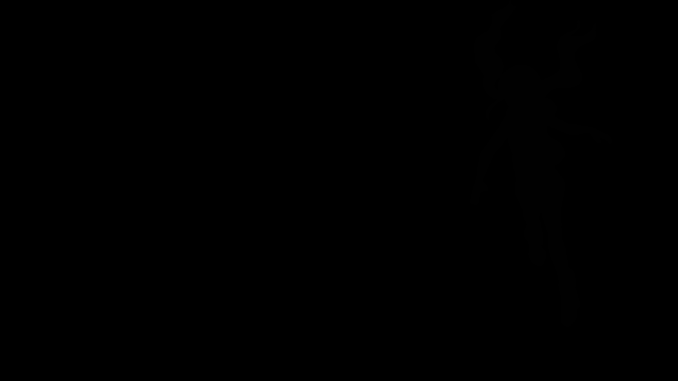

In [ ]:
cv2_imshow(binary_image)

In [ ]:
def replace_background(bg1_image, bg2_image, ob_image):
    diffirence_single_channel = compute_diffirence(bg1_image, ob_image)

    binary_mask = compute_binary_mask(diffirence_single_channel)

    binary_mask = cv2.merge([binary_mask, binary_mask, binary_mask])

    output = np.where(binary_mask == 1, ob_image, bg2_image)

    return output

array([[[113,  65,   1],
        [113,  65,   1],
        [113,  65,   1],
        ...,
        [138,  82,   1],
        [138,  82,   1],
        [138,  82,   1]],

       [[113,  65,   1],
        [113,  65,   1],
        [113,  65,   1],
        ...,
        [138,  82,   1],
        [138,  82,   1],
        [138,  82,   1]],

       [[114,  66,   2],
        [114,  66,   2],
        [114,  66,   2],
        ...,
        [136,  82,   1],
        [136,  82,   1],
        [136,  82,   1]],

       ...,

       [[ 37,   9,   2],
        [ 49,   1,   5],
        [ 29,  20,  26],
        ...,
        [ 35,  67, 114],
        [  9,  34,  75],
        [  0,  13,  49]],

       [[  4,  24,  49],
        [  5,  20,  50],
        [ 15,  84, 116],
        ...,
        [ 53, 179, 236],
        [ 23, 144, 209],
        [  0, 115, 179]],

       [[ 33,  77, 119],
        [  5,  21,  68],
        [ 29, 104, 148],
        ...,
        [ 43, 138, 225],
        [ 25, 122, 215],
        [  5, 104, 203]]], dtype=uint8)
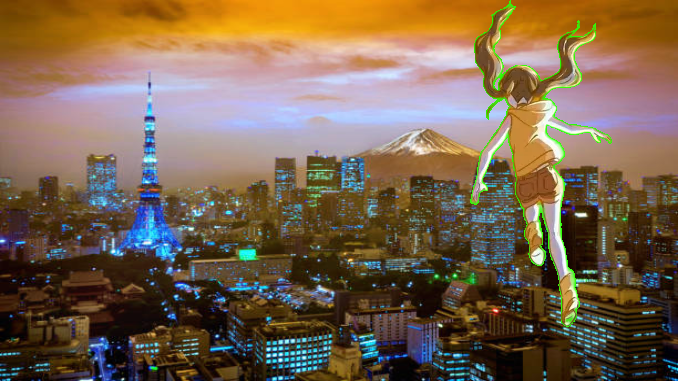

In [ ]:
replace_background(bg1_image=bg1_image, bg2_image=bg2_image, ob_image=ob_image)